In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

'''Importing extra modules'''
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

'''Importing modelling packages'''
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.linear_model import LogisticRegression

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Exploratory Data Analysis
Here we will explore our datasets, do some data cleaning and possibly some feature engineering

In [4]:
# Checking shape of dataset
train_data.shape

(891, 12)

In [5]:
# Checking for descriptive info
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### **What are the variables in this dataset?**

Description of the features:
1. **PassenderId** - is a unique identification number assigned to each passenger.
2. **Survived** - indicates if the passenger survived or parished (0 = No, 1 = Yes).
3. **Pclass** - passenger class (1 = 1st class, 2 = 2nd class, 3 = 3rd class).
4. **Name** - name of the passenger.
5. **Sex** - gender of the passenger.
6. **Age** - age of the passenger.
7. **SibSp** - no. of siblings/spouses aboard.
8. **Parch** - no. of parents/children aboard.
9. **Ticket** - ticket number assigned to a passenger.
10. **Fare** - price of the ticket
11. **Cabin** - cabin category assigned to a passenger.
12. **Embarked** - which port the passenger boarded from (C = Cherbourg, Q = Queenstown, S = Southampton).

**The purpose of this dataset is to used to predict on the test dataset, if a passenger survived or not. Hence, the target variable is `Survived` & the rest are predictor features.**

In [6]:
# Checking for missing values
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

After checking for missing values, it turns out that the `Age` column is missing 177 values, `Cabin` is missing 687 & `Embarked` is missing 2.
Potential ways we could go about is:
- `Age`: Aggregate the age with the mean age of passengers
- `Cabin`: Group the cabin into categorical, with missing values asigned 'Unknown'
- `Embarked`: Could leave it as 2 out of 891 is pretty insignificant, furthermore our tree-based models are robust to it.

In [7]:
# Checking for duplicates
train_data.duplicated().sum()

0

In [8]:
# Copying train_data into another new DataFrame
df = train_data.copy()

#### Check outliers

Check for outliers in the data.

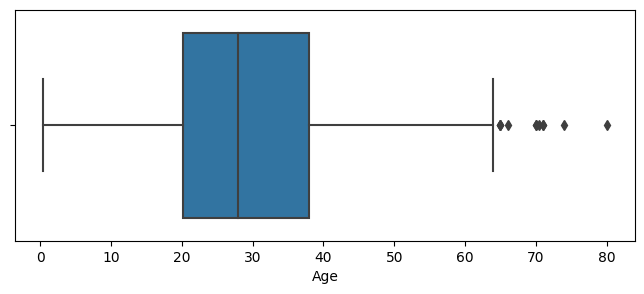

In [9]:
# Checking Age distribution
plt.figure(figsize=(8,3))
sns.boxplot(x=df['Age']);

In [10]:
# Determining how many rows contains outliers
percentile25 = df['Age'].quantile(0.25)
percentile75 = df['Age'].quantile(0.75)
iqr = percentile75 - percentile25

# Establishing lower & upper limits
lower_limit = percentile25 - 1.5 * iqr
upper_limit = percentile75 + 1.5 * iqr
print('lower_limit: ', lower_limit)
print('upper_limit: ', upper_limit)

age_outliers = df[(df['Age'] < lower_limit) | (df['Age'] > upper_limit)]
print('No. of rows of Age outliers: ', len(age_outliers))

lower_limit:  -6.6875
upper_limit:  64.8125
No. of rows of Age outliers:  11


**Logistic Regression** is quite sensitive to outliers, while **Tree-based models (DecisionTree, RandomForest, XGBoost Classifier)** are quite robust to outliers due to their splitting mechanism, ensemble methods & gradient boosting.

Since there are only 11 outliers in the `Age` column, keeping them might not affect the Logistic Regression that much.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


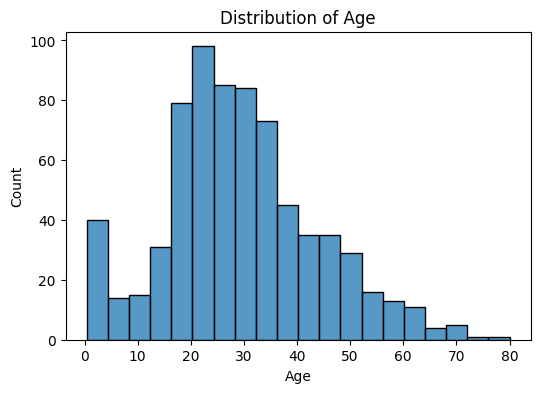

In [11]:
'''Distribution of Age Histogram'''
plt.figure(figsize=(6,4))
sns.histplot(df['Age'])
plt.xlabel('Age')
plt.title('Distribution of Age');

#### Dealing with missing values

#### 1) Aggregate `Age` column

Earlier, it was mentioned that we could calculate the mean age of the training dataset & replace the missing ages with the mean.

In [12]:
# Calculating the mean age
mean_age = df['Age'].mean()
mean_age_rounded = round(mean_age, 1)
mean_age_rounded

29.7

The average age is **29.7**, therefore we'll replace the missing values with this.

In [13]:
# Filling missing `Age` data with average age
df['Age'].fillna(mean_age_rounded, inplace=True)
df.head(10)

/tmp/ipykernel_18/3529145118.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(mean_age_rounded, inplace=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.7,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


#### 2) Categorize `Cabin` column

Earlier, it was found that `Cabin` was a object type data. We could divide the `Cabin` into categories then group all missing values to be labelled as **'X'**.

But first, let's take a look at the various data in the `Cabin` column

In [14]:
# Exploring the Cabin Columns
df['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

The data in the `Cabin` column contains a letter, following with numbers to describe the cabin information. As we can see, the naming of the cabins are pretty inconsistent. Some has 3 numbers, while others might have 2 numbers.

Let's simplify it by **extracting the first letter of the cabin to categorize them**.

Pictures of the titanic levels found online, show that the lifeboats are on the sundeck, which is the highest level of the ship. This means that cabins on the higher floor have better access to them, increasing the likelihood of surviving. Therefore, I've added hierarchy to the category.

The order of the cabins are assigned as: ***A, B, C, D, E, F, G, H, T, X***.  

X is assigned as the lowest because it assumed that passengers in this category are difficult to infer which level they might be at during the accident.

link: https://rmstitanic1912.weebly.com/the-levels-of-the-titanic.html

In [15]:
'''
    1) Replaces missing values with 'Missing'
    2) Extracts the first letter of each cabin
    3) 'Missing' is then converted in 'X'
'''
df['CabinProcessed'] = df['Cabin'].fillna('Missing').apply(lambda x:x[0] if x!='Missing' else 'X')

# Convert to CabinProcessed into categorical variables
df['CabinProcessed'] = (df['CabinProcessed'].astype('category')
                        .cat.set_categories(['A','B','C','D','E','F','G','T','X'])
                        .cat.codes
                       )
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinProcessed
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,8
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,8
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8


It appears to be many cabin categories, let's take a look at how they are distributed.

In [16]:
df['CabinProcessed'].value_counts()

CabinProcessed
8    687
2     59
1     47
3     33
4     32
0     15
5     13
6      4
7      1
Name: count, dtype: int64

In [17]:
# Check for missing values again
df.isna().sum()

PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin             687
Embarked            2
CabinProcessed      0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     891 non-null    int64  
 1   Survived        891 non-null    int64  
 2   Pclass          891 non-null    int64  
 3   Name            891 non-null    object 
 4   Sex             891 non-null    object 
 5   Age             891 non-null    float64
 6   SibSp           891 non-null    int64  
 7   Parch           891 non-null    int64  
 8   Ticket          891 non-null    object 
 9   Fare            891 non-null    float64
 10  Cabin           204 non-null    object 
 11  Embarked        889 non-null    object 
 12  CabinProcessed  891 non-null    int8   
dtypes: float64(2), int64(5), int8(1), object(5)
memory usage: 84.5+ KB


### Converting features into numerical values

Machine learning models can only work with numerical values, hence we shall convert the remaining features that are are interested in, into numerical dtypes. 

These features are `Sex`, `Embarked`

#### LabelEncode `Sex`

In [19]:
# Import `LabelEncoder` from scikit-learn
from sklearn.preprocessing import LabelEncoder
# Initialize label encoder
label_encoder = LabelEncoder()
df['Sex_enc'] = label_encoder.fit_transform(df['Sex'])

#### LabelEncode `Embarked`

In [20]:
df['Embarked_enc'] = label_encoder.fit_transform(df['Embarked'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinProcessed,Sex_enc,Embarked_enc
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,8,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,8,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8,1,2


### Feature Engineering

#### Adding a `Children` feature

It could be assumed that ***women & children*** were prioritized in evacuating the Titanic. However, only the `Sex` column distinguishes ***men*** from ***women***. There is no column in identifying ***children***, hence we shall add a new column `Children` and label encode it.

Also, anyone who is under the age of 18, shall be considered as a child.

In [21]:
# Adding a new `Children` column.
df['Children'] = df['Age'] < 18
df['Children'] = df['Children'].astype(int)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinProcessed,Sex_enc,Embarked_enc,Children
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,8,1,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,8,0,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8,1,2,0
5,6,0,3,"Moran, Mr. James",male,29.7,0,0,330877,8.4583,NaN,Q,8,1,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,4,1,2,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,8,1,2,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,8,0,2,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,8,0,0,1


#### Combining SibSp & Parch

Another new feature we could create is combining both (`SibSp` & `Parch` + 1) into `Family`. 

During an evacuation, one could be swarmed with locating all family members in the chaotic environment before evacuating together, hence lowering the chance of survival of the passenger rate.

The idea is that with lesser family members, the passenger could immediately head for evacuation, leading to a higher rate of survival.

In [22]:
df['Family'] = df['SibSp'] + df['Parch'] + 1
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinProcessed,Sex_enc,Embarked_enc,Children,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,8,1,2,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0,0,0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,8,0,2,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0,2,0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8,1,2,0,1


####  Removing redundant features

Now, we can remove redundant features like `PassengerId`, `Name`, `Ticket` & `Fare`. Likewise `SibSp`, `Parch`, `Sex`, `Embarked` & `Cabin` will also be removed to avoid duplicate biases results.

In [23]:
df1 = df.drop(columns=['Name', 'Sex', 'Cabin', 'Ticket', 'Fare', 'SibSp', 'Parch', 'Embarked', 'PassengerId'])
df1.head()

,Survived,Pclass,Age,CabinProcessed,Sex_enc,Embarked_enc,Children,Family
0,0,3,22.0,8,1,2,0,2
1,1,1,38.0,2,0,0,0,2
2,1,3,26.0,8,0,2,0,1
3,1,1,35.0,2,0,2,0,2
4,0,3,35.0,8,1,2,0,1


In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Survived        891 non-null    int64  
 1   Pclass          891 non-null    int64  
 2   Age             891 non-null    float64
 3   CabinProcessed  891 non-null    int8   
 4   Sex_enc         891 non-null    int64  
 5   Embarked_enc    891 non-null    int64  
 6   Children        891 non-null    int64  
 7   Family          891 non-null    int64  
dtypes: float64(1), int64(6), int8(1)
memory usage: 49.7 KB


In [25]:
# Checking the percentage of `Survived`

df1['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

### Modelling

**Now the data has been prepared, we can finally start on the modelling.**

#### Type of prediction task:

The goal is to predict whether a passenger survives the Titanic, which is a categorical outcome variable. So this task invovles classification, more specifically, ***binary classification***. `Survived` can either be 0 (did not survived) or 1 (survived).

#### Types of model suitable for this task:

Since the outcome variable is categorical, there are a few approaches we can take & determine how they compare:
- **Logistic Regression**
- **DecisionTree**
- **RandomForestClassifier**
- **XGBoost Classifier**

In order to decide which scoring metric should be used, we should further understand the consequences of the model predicting the wrong value:
- **False Positive**: Assumes the passenger did survive when indeed they did not.
- **False Negative**: Assumes the passenger did died but actually survived.

#### Defining a function to save Metric Scores of all models

This function will create a dictionary that will include:
- **Model's Name**
- **Accuracy Score**
- **Recall Score**
- **Precision Score**
- **F1 Score**
- **ROC_AUC**

In [26]:
def calculate_metrics(y_true, y_pred, model_name):
    metrics = {
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred),
        'ROC AUC': roc_auc_score(y_true, y_pred)
    }
    return metrics

def save_metrics_to_dataframe(log_reg_metrics, other_models_metrics):
    # Convert lists of dictionaries to DataFrames
    log_reg_metrics_df = pd.DataFrame(log_reg_metrics)
    other_models_metrics_df = pd.DataFrame(other_models_metrics)
    
    # Concatenate DataFrames
    combined_metrics_df = pd.concat([log_reg_metrics_df, other_models_metrics_df], ignore_index=True)
    
    return combined_metrics_df

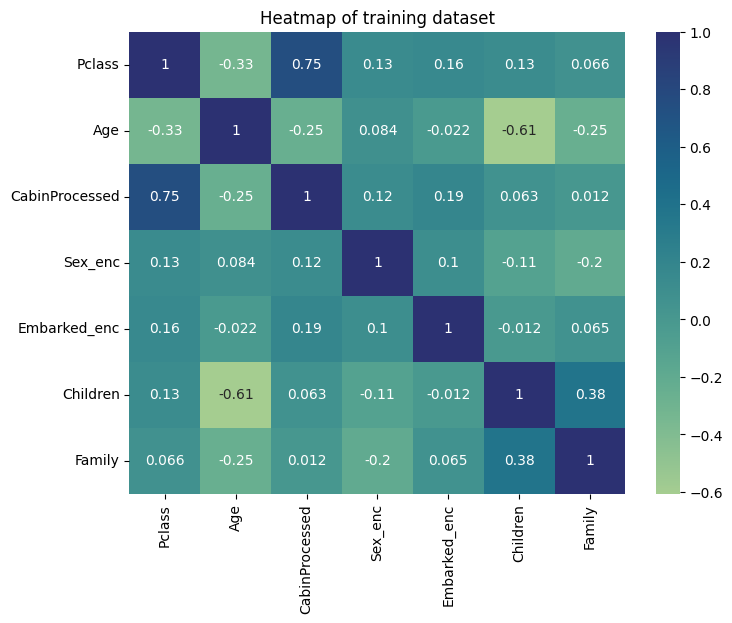

In [27]:
# Create a heatmap to see how correlated the variables are

plt.figure(figsize=(8,6))
sns.heatmap(df1[['Pclass', 'Age', 'CabinProcessed', 'Sex_enc', 'Embarked_enc',
                 'Children', 'Family']].corr(), annot=True, cmap='crest')
plt.title('Heatmap of training dataset')
plt.show()

#### Splitting the target & predictor features

In [28]:
# Isolating the outcome variable
y = df1['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [29]:
# Selecting features to be used
X = df1.drop('Survived', axis=1)
X.head()

,Pclass,Age,CabinProcessed,Sex_enc,Embarked_enc,Children,Family
0,3,22.0,8,1,2,0,2
1,1,38.0,2,0,0,0,2
2,3,26.0,8,0,2,0,1
3,1,35.0,2,0,2,0,2
4,3,35.0,8,1,2,0,1


Creating a DataFrame to store the scoring metrics of Logistic Regression

In [30]:
# Split the training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression

This section will focus on **Logistic Regression (LR)**. In order for a fair comparision between models, we shall use `GridSearchCV` for all models and evaluate the scores before applying it on the test dataset.

In [31]:
# Define parameter grid for Logistic Regression
param_grid_log_reg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2']
}

# Construct the Logistic Regression and fit into training dataset
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000)

# GridSearchCV for Logistic Regression
grid_log_reg = GridSearchCV(log_reg, param_grid_log_reg, cv=5, scoring='accuracy')
grid_log_reg.fit(X_train, y_train)

# Best Logistic Regression hyperparameters
best_log_reg = grid_log_reg.best_estimator_

# Get predictions on validation set
log_reg_val_pred = best_log_reg.predict(X_val)

# Evaluation metrics for validation set
log_reg_metrics = calculate_metrics(y_val, log_reg_val_pred, 'Logistic Regression')

print('Logistic Regression Validation Metrics: ')
print(log_reg_metrics)

Logistic Regression Validation Metrics: 
{'Model': 'Logistic Regression', 'Accuracy': 0.8156424581005587, 'Recall': 0.7567567567567568, 'Precision': 0.7887323943661971, 'F1 Score': 0.7724137931034482, 'ROC AUC': 0.806949806949807}


### Decision Tree, Random Forest, XGBoost Classifier

This section covers the modelling, training and validating **Decision Tree, Random Forest, XGBoost Classifier** with `GridSearchCV`

In [32]:
# Define parameter grids for other models
param_grid_dec_tree = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 10, 20]}
param_grid_rf = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}
param_grid_xgb = {'n_estimators': [100, 200], 'max_depth': [3, 6, 9], 'learning_rate': [0.01, 0.1, 0.2]}

# Decision Tree
grid_dec_tree = GridSearchCV(DecisionTreeClassifier(), param_grid_dec_tree, cv=5, scoring='accuracy')
grid_dec_tree.fit(X_train, y_train)
best_dec_tree = grid_dec_tree.best_estimator_

# Random Forest
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_

# XGBoost
grid_xgb = GridSearchCV(XGBClassifier(), param_grid_xgb, cv=5, scoring='accuracy')
grid_xgb.fit(X_train, y_train)
best_xgb = grid_xgb.best_estimator_

In [33]:
# Predictions on validation set for other models
dec_tree_val_predictions = best_dec_tree.predict(X_val)
rf_val_predictions = best_rf.predict(X_val)
xgb_val_predictions = best_xgb.predict(X_val)

# Evaluation metrics for other models on validation set
dec_tree_metrics = calculate_metrics(y_val, dec_tree_val_predictions, 'Decision Tree')
rf_metrics = calculate_metrics(y_val, rf_val_predictions, 'Random Forest')
xgb_metrics = calculate_metrics(y_val, xgb_val_predictions, 'XGBoost')

In [34]:
# Combine metrics into a single DataFrame
combined_metrics_df = save_metrics_to_dataframe([log_reg_metrics], [dec_tree_metrics, rf_metrics, xgb_metrics])

# Print or use the combined metrics DataFrame
combined_metrics_df

,Model,Accuracy,Recall,Precision,F1 Score,ROC AUC
0,Logistic Regression,0.815642,0.756757,0.788732,0.772414,0.806950
1,Decision Tree,0.782123,0.716216,0.746479,0.731034,0.772394
2,Random Forest,0.782123,0.743243,0.733333,0.738255,0.776384
3,XGBoost,0.821229,0.689189,0.850000,0.761194,0.801737


### Selecting Champion Model

Above shows the scoring metrics of Logistic Regression, Decision Tree, Random Forest & XGBoost. 

Overall **XGBoost** model outperformed the other models in all scoring metrics with the exception of `Recall`, which lost to **Random Forest** by **0.041**, which is considered not that significant.

XGBoost model scoring metrics were:
- `Accuracy`: 0.822
- `Recall`: 0.689
- `Precision`: 0.850
- `F1 Score`: 0.761
- `ROC_AUC`: 0.802

Therefore, **XGBoost** shall be selected to predict on the test dataset to determine whether a passenger survives the titanic or not.

#### Confusion Matrix

A confusion matrix can give some insights on how the **XGBoost** model predicted on the validation set, giving a quantifiable score on how many of its predictions were correct and wrong. 

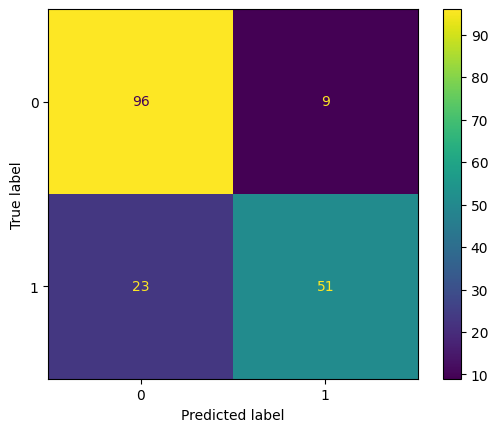

In [35]:
# Confusion Matrix
preds = best_xgb.predict(X_val)

cm = confusion_matrix(y_val, preds, labels=grid_xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_xgb.classes_)
disp.plot(values_format='');

#### Confusion Matrix Parameters
- **True Negatives** (Top Left): Correctly predicted passenger did not survive.
- **False Positive** (Top Right): Wrongly predicted passenger survived but actually did not.
- **True Positives** (Bottom Right): Correctly predicted passenger did survive.
- **False Negatives** (Bottom Left): Wrongly predicted passenger did not survive but actually did.

Based on the validation sets, the **XGboost** model predicted False Positives and False Negatives, 9 & 23, respectively. This number is quite small compared to the True Positives & True Negatives, which indicates this is a fairly good model. This is further supported with the fairly good scoring metrics too.

#### Feature Importance

Digging a little into how the **XGBoost** model performed, using **Feature Importance**, we can get some insights on which features influence the most in terms whether or not a passenger surives.

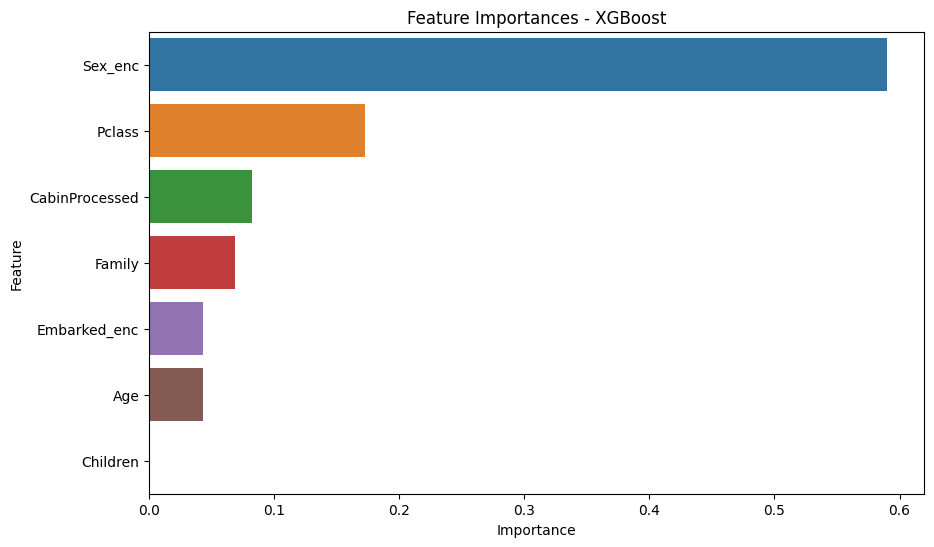

In [36]:
# Get feature importance from the Random Forest model
feature_importances = best_xgb.feature_importances_
features = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances - XGBoost')
plt.show()

Above shows the feature importance of the XGBoost model. It illustrates which features influenced the outcome variable `Survived` the most.

The top 3 features are `Sex_enc`, `Pclass`, and `CabinProcessed`. This is surprising as it was initially thought that `Children` might play a bigger role in survivability of a passenger.

### Applying to Test Dataset

The test dataset shall go through the same preprocessing, and encoding.

To recap, here are the steps we took earlier on the `train_data` were:
#### 1) Exploratory Data Analysis (EDA)     
  - Checked the dtyes of the features with `info`
  - Checked for missing & duplicated data in the features
  - Dealt with missing data either by aggregating with mean values/dropping
  - Extracted the first letter of `Cabin`, categorized & gave them hierarchy with `cat.codes`
  - 
  - Converted features into numerical dtypes
  
#### 2) Feature Engineering
  - Added `Children` & `Family` features
  - Removed redundant features
  
#### 3) Modelling
  - In this case, we shall apply Random Forest on the `test_data` & evaluate the scoring metrics

### 1) Exploratory Data Analysis

Exploratory Data Analysis is done to get a better understanding of the test dataset, before data cleaning, labelling, encoding & feature engineering.

In [37]:
df_test = test_data.copy()

In [38]:
df_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [39]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [40]:
df_test.duplicated().sum()

0

In [41]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Missing data

Likewise, in the test dataset, there are a few missing values from features like `Age`, `Cabin`, & `Fare`.
Again, we could proceed in the same way as we did for the training data, which is:
- `Age`: Aggregate the age & replace missing values with the mean age.
- `Cabin`: Group the cabin into categorical, with missing values asigned 'Unknown'
- `Fare`: Since only 1 value is missing out of the total 418 entries, we could drop this particular row.

#### Digging deeper into the `Age` feature

- Boxplot of age
- Determine how many outliers
- Distribution

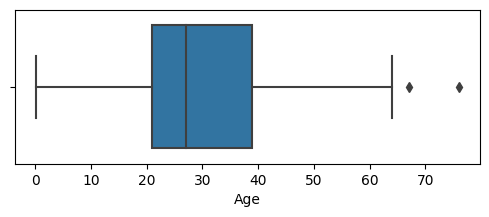

In [42]:
# Boxplot of `Age` feature
plt.figure(figsize=(6,2))
sns.boxplot(x=df_test['Age']);

In [43]:
# Determining how many rows contains outliers
percentile25 = df_test['Age'].quantile(0.25)
percentile75 = df_test['Age'].quantile(0.75)
iqr = percentile75 - percentile25

# Establishing lower & upper limits
lower_limit = percentile25 - 1.5 * iqr
upper_limit = percentile75 + 1.5 * iqr
print('lower_limit: ', lower_limit)
print('upper_limit: ', upper_limit)

age_outliers = df_test[(df_test['Age'] < lower_limit) | (df_test['Age'] > upper_limit)]
print('No. of rows of Age outliers: ', len(age_outliers))

lower_limit:  -6.0
upper_limit:  66.0
No. of rows of Age outliers:  2


Likewise in the training data, the number of outliers in the `Age` column is only 2. Hence, we will keep this few outliers.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


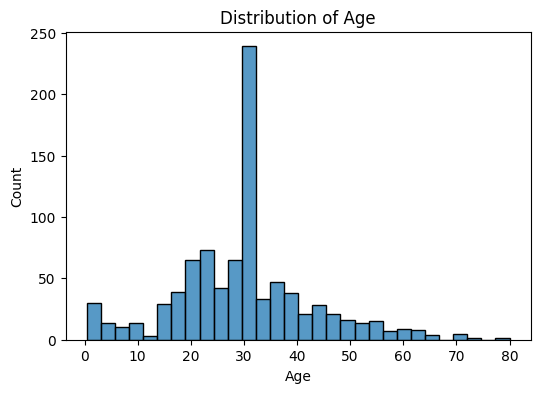

In [44]:
# Distribution of Age Histogram
plt.figure(figsize=(6,4))
sns.histplot(df['Age'])
plt.xlabel('Age')
plt.title('Distribution of Age');

After deciding to keep the `Age` outliers, we shall now determine the mean age of all the passengers then replace the missing values with it.

In [45]:
# Calculating the mean age
mean_age = df_test['Age'].mean()
mean_age_rounded = round(mean_age, 1)
mean_age_rounded

30.3

The average age of the 418 passengers is **30.2**. We shall replace the missing ages with this.

In [46]:
# Filling missing `Age` data with average age
df_test['Age'].fillna(mean_age_rounded, inplace=True)
df.head(10)

/tmp/ipykernel_18/1796991360.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Age'].fillna(mean_age_rounded, inplace=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinProcessed,Sex_enc,Embarked_enc,Children,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,8,1,2,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0,0,0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,8,0,2,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0,2,0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8,1,2,0,1
5,6,0,3,"Moran, Mr. James",male,29.7,0,0,330877,8.4583,NaN,Q,8,1,1,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,4,1,2,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,8,1,2,1,5
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,8,0,2,0,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,8,0,0,1,2


#### Categorizing `Cabin` feature

Likewise, the data in `Cabin` will be converted from an object type into a categorical value then `cat.code` to assign hierarchial numbers as the lifeboats are on the sundeck & the higher floors would have closer access to them. 

Missing values shall be grouped together in its own category as 'X'.

In [47]:
# Exploring the Cabin Columns
df_test['Cabin'].value_counts()

Cabin
B57 B59 B63 B66    3
B45                2
C89                2
C55 C57            2
A34                2
                  ..
E52                1
D30                1
E31                1
C62 C64            1
C105               1
Name: count, Length: 76, dtype: int64

In [48]:
'''
    1) Replaces missing values with 'Missing'
    2) Extracts the first letter of each cabin
    3) 'Missing' is then converted in 'X'
'''
df_test['CabinProcessed'] = df_test['Cabin'].fillna('Missing').apply(lambda x:x[0] if x!='Missing' else 'X')

# Convert to CabinProcessed into categorical variables
df_test['CabinProcessed'] = (df_test['CabinProcessed'].astype('category')
                        .cat.set_categories(['A','B','C','D','E','F','G','T','X'])
                        .cat.codes
                       )
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinProcessed
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,8
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,8
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,8
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,8
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,8


In [49]:
# Checking if Cabin were processed properly
df_test['CabinProcessed'].value_counts()

CabinProcessed
8    327
2     35
1     18
3     13
4      9
5      8
0      7
6      1
Name: count, dtype: int64

Let's check if there's still any missing values in this test dataset

In [50]:
df_test.isna().sum()

PassengerId         0
Pclass              0
Name                0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                1
Cabin             327
Embarked            0
CabinProcessed      0
dtype: int64

Great, there's all the missing data has been dealt with! We can ignore the `Cabin` feature for now because we've already processed it into `CabinProcessed` & we'll drop the original `Cabin` feature before modelling.

### Converting features into numerical values

Machine learning models can only work with numerical values, hence we shall convert the remaining features that are are interested in, into numerical dtypes. 

These features are `Sex`, `Embarked`

#### LabelEncode `Sex`

In [51]:
df_test['Sex_enc'] = label_encoder.fit_transform(df_test['Sex'])

#### LabelEncode `Embarked`

In [52]:
df_test['Embarked_enc'] = label_encoder.fit_transform(df_test['Embarked'])
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinProcessed,Sex_enc,Embarked_enc
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,8,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,8,0,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,8,1,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,8,1,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,8,0,2


### 2) Feature Engineering

#### Adding `Children` feature

Similarly, we'll add a new feature called `Children` to determine if anyone is younger than 18 years old.

In [53]:
df_test['Children'] = df_test['Age'] < 18
df_test['Children'] = df_test['Children'].astype(int)
df_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinProcessed,Sex_enc,Embarked_enc,Children
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,8,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,8,0,2,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,8,1,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,8,1,2,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,8,0,2,0
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,8,1,2,1
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,8,0,1,0
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,8,1,2,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,8,0,0,0
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,8,1,2,0


#### Combining SibSp & Parch

Similarly, we'll combine the `SibSp` & `Parch` into a `Family` feature.

In [54]:
df_test['Family'] = df_test['SibSp'] + df_test['Parch'] + 1
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinProcessed,Sex_enc,Embarked_enc,Children,Family
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,8,1,1,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,8,0,2,0,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,8,1,1,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,8,1,2,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,8,0,2,0,3


####  Removing redundant features

Now, we can remove redundant features like `PassengerId`, `Name`, `Ticket` & `Fare`. Likewise `SibSp`, `Parch`, `Sex`, `Embarked` & `Cabin` will also be removed to avoid duplicate biases results.

In [55]:
df_test = df_test.drop(columns=['Name', 'Sex', 'Cabin', 'Ticket', 'Fare', 'SibSp', 'Parch', 'Embarked', 'PassengerId'])
df_test.head()

,Pclass,Age,CabinProcessed,Sex_enc,Embarked_enc,Children,Family
0,3,34.5,8,1,1,0,1
1,3,47.0,8,0,2,0,2
2,2,62.0,8,1,1,0,1
3,3,27.0,8,1,2,0,1
4,3,22.0,8,0,2,0,3


In [56]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pclass          418 non-null    int64  
 1   Age             418 non-null    float64
 2   CabinProcessed  418 non-null    int8   
 3   Sex_enc         418 non-null    int64  
 4   Embarked_enc    418 non-null    int64  
 5   Children        418 non-null    int64  
 6   Family          418 non-null    int64  
dtypes: float64(1), int64(5), int8(1)
memory usage: 20.1 KB


### 3) Modelling

Here, we shall apply the Random Forest model & create and output to the predicted passenger survivability.

In [57]:
#df_test1 = df_test.drop('PassengerId', axis=1)

# Predict on test dataset
test_predictions = best_xgb.predict(df_test)

output = pd.DataFrame({'PassengerId': test_data['PassengerId'],
                      'Survived': test_predictions})
output.to_csv('submission2.csv', index=False)
print('Done!')

Done!
